# Exploring Popular Types of Housing in London

#### 1. What are the most popular types of properties for sale in the London?
From the data we collected we can see that flat/apartment is the most popular property to live in and this could be due to many reasons such as average salary in london, inflation, crime, population and many more factors. 

### Extracting Data

In [29]:
#Import all dependencies as we might need
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import requests
import time
import hvplot.pandas
import seaborn as sns

In [30]:
# Load the data into a pandas dataframe
london_df = pd.read_csv("Resources/london.csv")
london_df.head()

,Unnamed: 0,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code
0,0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY
1,1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA
2,2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL
3,3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP
4,4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL


### Cleaning Data

In [31]:
london_df.info()
#Here we are checking if we have null values and if we have missing values
#You can see we have missing values as location = 2518 and the rest = 3480

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         3480 non-null   int64 
 1   Property Name      3480 non-null   object
 2   Price              3480 non-null   int64 
 3   House Type         3480 non-null   object
 4   Area in sq ft      3480 non-null   int64 
 5   No. of Bedrooms    3480 non-null   int64 
 6   No. of Bathrooms   3480 non-null   int64 
 7   No. of Receptions  3480 non-null   int64 
 8   Location           2518 non-null   object
 9   City/County        3480 non-null   object
 10  Postal Code        3480 non-null   object
dtypes: int64(6), object(5)
memory usage: 299.2+ KB


In [32]:
#Getting rid of missing values (NaN) using drop, inplace=true saves the 'dropped' data
london_df.dropna(inplace=True)
london_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2518 entries, 0 to 3479
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         2518 non-null   int64 
 1   Property Name      2518 non-null   object
 2   Price              2518 non-null   int64 
 3   House Type         2518 non-null   object
 4   Area in sq ft      2518 non-null   int64 
 5   No. of Bedrooms    2518 non-null   int64 
 6   No. of Bathrooms   2518 non-null   int64 
 7   No. of Receptions  2518 non-null   int64 
 8   Location           2518 non-null   object
 9   City/County        2518 non-null   object
 10  Postal Code        2518 non-null   object
dtypes: int64(6), object(5)
memory usage: 236.1+ KB


In [33]:
# Dropping any duplicate rows
london_df.drop_duplicates(inplace=True)

In [34]:
# Filter the data to include only London in City/Country column
london_df_1 = london_df[london_df['City/County'] == 'London']
london_df_1

,Unnamed: 0,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code
0,0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY
1,1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA
2,2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL
3,3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP
4,4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL
...,...,...,...,...,...,...,...,...,...,...,...
3473,3473,Park Lane,19950000,Flat / Apartment,3698,5,5,5,Mayfair,London,W1K 7AJ
3476,3476,St. James's Street,5275000,Flat / Apartment,1749,3,3,3,St James's,London,SW1A 1JT
3477,3477,Ingram Avenue,5995000,House,4435,6,6,6,Hampstead Garden Suburb,London,NW11 6TG
3478,3478,Cork Street,6300000,New development,1506,3,3,3,Mayfair,London,W1S 3AR


In [35]:
#Creating catogories for the postal code
def categorize_postal_code(postal_code):
    if postal_code.startswith(('W1', 'W2', 'W8', 'W9', 'SW1', 'SW3', 'SW5', 'SW6', 'SW7', 'SW10', 'SW11', 'WC1', 'WC2')):
        return 'CENTRAL LONDON'
    elif postal_code.startswith(('EC1', 'EC2', 'EC3', 'EC4')):
        return 'CITY OF LONDON'
    elif postal_code.startswith(('W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W10', 'W11', 'W12', 'W13', 'W14')):
        return 'WEST LONDON'
    elif postal_code.startswith(('N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'N11', 'N12', 'N13',
                                 'N14', 'N15', 'N16', 'N17', 'N18', 'N19', 'N20', 'N21', 'N22')): 
        return 'NORTH LONDON'
    elif postal_code.startswith(('NW1', 'NW2', 'NW3', 'NW4', 'NW5', 'NW6', 'NW7', 'NW8', 'NW9', 'NW10', 'NW11')):
        return 'NORTH WEST LONDON'
    elif postal_code.startswith(('E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10',
                                 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19','E20')):
        return 'EAST LONDON'
    elif postal_code.startswith(('SE1', 'SE2', 'SE3', 'SE4', 'SE5', 'SE6', 'SE7', 'SE8', 'SE9', 'SE10', 'SE11', 'SE12', 'SE13',
                                 'SE14', 'SE15', 'SE16', 'SE17', 'SE18', 'SE19', 'SE20', 'SE21', 'SE22', 'SE23', 'SE24',
                                'SE25', 'SE26', 'SE27', 'SE28')): 
         return 'SOUTH EAST LONDON'
    elif postal_code.startswith(('SW1', 'SW2', 'SW4', 'SW8', 'SW9', 'SW12', 'SW13','SW14', 'SW15', 'SW16',
                                 'SW17', 'SW18', 'SW19', 'SW20')): 
         return 'SOUTH WEST LONDON'
    else:
        return 'OTHER'

In [36]:
#Creating a new column for the Postal Code Category
london_df_1['Post Code Category'] = london_df_1['Postal Code'].apply(categorize_postal_code)
london_df_1

C:\Users\hamim\AppData\Local\Temp\ipykernel_15844\850593344.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  london_df_1['Post Code Category'] = london_df_1['Postal Code'].apply(categorize_postal_code)


,Unnamed: 0,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code,Post Code Category
0,0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY,CENTRAL LONDON
1,1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA,CITY OF LONDON
2,2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL,CENTRAL LONDON
3,3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP,CENTRAL LONDON
4,4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL,CENTRAL LONDON
...,...,...,...,...,...,...,...,...,...,...,...,...
3473,3473,Park Lane,19950000,Flat / Apartment,3698,5,5,5,Mayfair,London,W1K 7AJ,CENTRAL LONDON
3476,3476,St. James's Street,5275000,Flat / Apartment,1749,3,3,3,St James's,London,SW1A 1JT,CENTRAL LONDON
3477,3477,Ingram Avenue,5995000,House,4435,6,6,6,Hampstead Garden Suburb,London,NW11 6TG,NORTH WEST LONDON
3478,3478,Cork Street,6300000,New development,1506,3,3,3,Mayfair,London,W1S 3AR,CENTRAL LONDON


In [37]:
count_type=london_df_1['Post Code Category'].value_counts()
count_type

CENTRAL LONDON       1104
NORTH WEST LONDON     239
EAST LONDON           226
NORTH LONDON          178
WEST LONDON           134
CITY OF LONDON         75
SOUTH EAST LONDON      52
SOUTH WEST LONDON      49
OTHER                   1
Name: Post Code Category, dtype: int64

In [38]:
#Dropping 'Unnamed: 0','Property Name','City/County' and 'Postal Code' columns
##Dropping 'No. of Bathrooms' and 'No. of Receptions' columns as it has same value as 'No. of Bedrooms'
london_df_1 = london_df_1.drop (columns = ['Unnamed: 0','Property Name','City/County','Postal Code','No. of Bathrooms','No. of Receptions'])
london_df_1

,Price,House Type,Area in sq ft,No. of Bedrooms,Location,Post Code Category
0,1675000,House,2716,5,Wimbledon,CENTRAL LONDON
1,650000,Flat / Apartment,814,2,Clerkenwell,CITY OF LONDON
2,735000,Flat / Apartment,761,2,Putney,CENTRAL LONDON
3,1765000,House,1986,4,Putney,CENTRAL LONDON
4,675000,Flat / Apartment,700,2,Putney,CENTRAL LONDON
...,...,...,...,...,...,...
3473,19950000,Flat / Apartment,3698,5,Mayfair,CENTRAL LONDON
3476,5275000,Flat / Apartment,1749,3,St James's,CENTRAL LONDON
3477,5995000,House,4435,6,Hampstead Garden Suburb,NORTH WEST LONDON
3478,6300000,New development,1506,3,Mayfair,CENTRAL LONDON


In [39]:
#Saving clean_df to Resources
clean_df = london_df_1
clean_df.to_csv('Resources/clean_df.csv',index=False)

### Data Exploration

In [40]:
clean_df.head()

,Price,House Type,Area in sq ft,No. of Bedrooms,Location,Post Code Category
0,1675000,House,2716,5,Wimbledon,CENTRAL LONDON
1,650000,Flat / Apartment,814,2,Clerkenwell,CITY OF LONDON
2,735000,Flat / Apartment,761,2,Putney,CENTRAL LONDON
3,1765000,House,1986,4,Putney,CENTRAL LONDON
4,675000,Flat / Apartment,700,2,Putney,CENTRAL LONDON


In [41]:
#Creating a new feature for the values in 'House Type' and assigning them with '1' and '0'
pd.get_dummies(clean_df['House Type'])

,Duplex,Flat / Apartment,House,Mews,New development,Penthouse,Studio
0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
3473,0,1,0,0,0,0,0
3476,0,1,0,0,0,0,0
3477,0,0,1,0,0,0,0
3478,0,0,0,0,1,0,0


In [42]:
#Joining this with our london_df_1 data and drop 'House Type' column
house_features = clean_df.join(pd.get_dummies(clean_df['House Type'])).drop(['House Type'], axis=1)
house_features

,Price,Area in sq ft,No. of Bedrooms,Location,Post Code Category,Duplex,Flat / Apartment,House,Mews,New development,Penthouse,Studio
0,1675000,2716,5,Wimbledon,CENTRAL LONDON,0,0,1,0,0,0,0
1,650000,814,2,Clerkenwell,CITY OF LONDON,0,1,0,0,0,0,0
2,735000,761,2,Putney,CENTRAL LONDON,0,1,0,0,0,0,0
3,1765000,1986,4,Putney,CENTRAL LONDON,0,0,1,0,0,0,0
4,675000,700,2,Putney,CENTRAL LONDON,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3473,19950000,3698,5,Mayfair,CENTRAL LONDON,0,1,0,0,0,0,0
3476,5275000,1749,3,St James's,CENTRAL LONDON,0,1,0,0,0,0,0
3477,5995000,4435,6,Hampstead Garden Suburb,NORTH WEST LONDON,0,0,1,0,0,0,0
3478,6300000,1506,3,Mayfair,CENTRAL LONDON,0,0,0,0,1,0,0


In [43]:
#Check how the data correlates
round(house_features.corr(),3)

,Price,Area in sq ft,No. of Bedrooms,Duplex,Flat / Apartment,House,Mews,New development,Penthouse,Studio
Price,1.000,0.761,0.471,-0.018,-0.264,0.207,-0.007,0.059,0.096,-0.037
Area in sq ft,0.761,1.000,0.786,-0.013,-0.445,0.505,-0.007,-0.059,0.046,-0.056
No. of Bedrooms,0.471,0.786,1.000,-0.005,-0.539,0.703,0.002,-0.153,-0.018,-0.110
Duplex,-0.018,-0.013,-0.005,1.000,-0.044,-0.031,-0.001,-0.017,-0.009,-0.003
Flat / Apartment,-0.264,-0.445,-0.539,-0.044,1.000,-0.702,-0.031,-0.379,-0.201,-0.059
House,0.207,0.505,0.703,-0.031,-0.702,1.000,-0.022,-0.264,-0.140,-0.041
Mews,-0.007,-0.007,0.002,-0.001,-0.031,-0.022,1.000,-0.012,-0.006,-0.002
New development,0.059,-0.059,-0.153,-0.017,-0.379,-0.264,-0.012,1.000,-0.075,-0.022
Penthouse,0.096,0.046,-0.018,-0.009,-0.201,-0.140,-0.006,-0.075,1.000,-0.012
Studio,-0.037,-0.056,-0.110,-0.003,-0.059,-0.041,-0.002,-0.022,-0.012,1.000


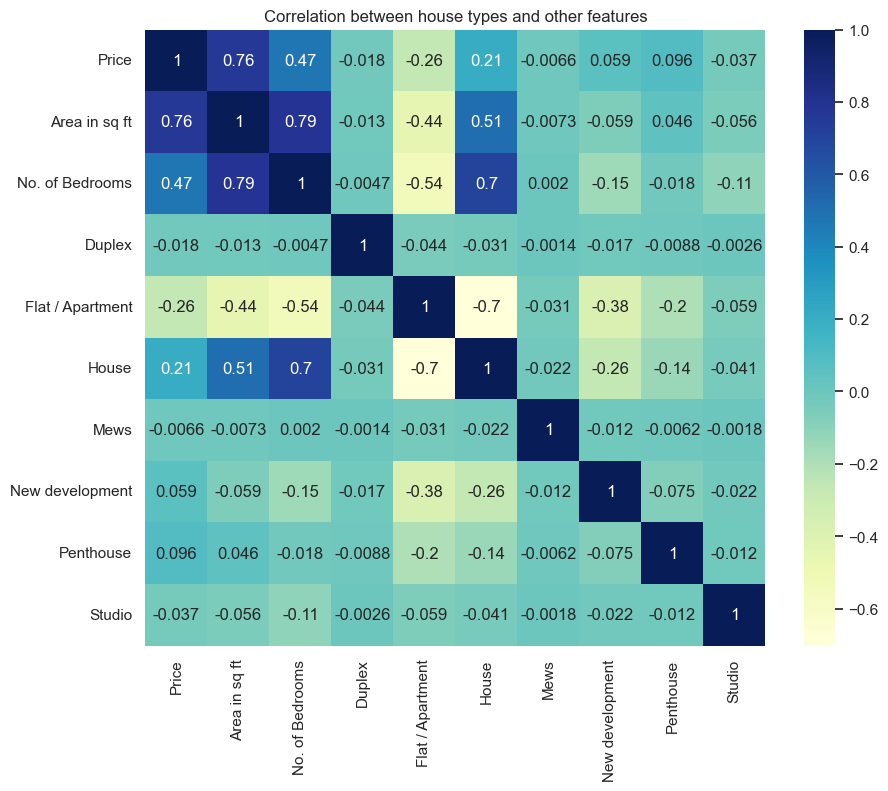

In [121]:
#Using Seaborn to create a heatmap
sns.heatmap(house_features.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation between house types and other features')
plt.savefig("Resources/Correlation_between_house_types_and_other_features")

In this heatmap, the main part to look at is the 'house type' and the 'price'. There isn't much of a correlation between these values as it is close to 0 indicating no correlaion. However, we can see that as the 'area in sq ft'increase the price increases, this is shown by the Pearson's r value of 0.76. this indicates a strong positive correlation. 

In [45]:
#Do the same for 'Post Code Category'
post_code_features = clean_df.join(pd.get_dummies(clean_df['Post Code Category'])).drop(['Post Code Category'], axis=1)
post_code_features

,Price,House Type,Area in sq ft,No. of Bedrooms,Location,CENTRAL LONDON,CITY OF LONDON,EAST LONDON,NORTH LONDON,NORTH WEST LONDON,OTHER,SOUTH EAST LONDON,SOUTH WEST LONDON,WEST LONDON
0,1675000,House,2716,5,Wimbledon,1,0,0,0,0,0,0,0,0
1,650000,Flat / Apartment,814,2,Clerkenwell,0,1,0,0,0,0,0,0,0
2,735000,Flat / Apartment,761,2,Putney,1,0,0,0,0,0,0,0,0
3,1765000,House,1986,4,Putney,1,0,0,0,0,0,0,0,0
4,675000,Flat / Apartment,700,2,Putney,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3473,19950000,Flat / Apartment,3698,5,Mayfair,1,0,0,0,0,0,0,0,0
3476,5275000,Flat / Apartment,1749,3,St James's,1,0,0,0,0,0,0,0,0
3477,5995000,House,4435,6,Hampstead Garden Suburb,0,0,0,0,1,0,0,0,0
3478,6300000,New development,1506,3,Mayfair,1,0,0,0,0,0,0,0,0


In [46]:
#Check how the data correlates
round(post_code_features.corr(),3)

,Price,Area in sq ft,No. of Bedrooms,CENTRAL LONDON,CITY OF LONDON,EAST LONDON,NORTH LONDON,NORTH WEST LONDON,OTHER,SOUTH EAST LONDON,SOUTH WEST LONDON,WEST LONDON
Price,1.000,0.761,0.471,0.120,-0.050,-0.161,-0.052,0.105,-0.008,-0.027,-0.010,-0.052
Area in sq ft,0.761,1.000,0.786,0.088,-0.091,-0.177,-0.026,0.079,0.021,-0.036,0.071,0.021
No. of Bedrooms,0.471,0.786,1.000,0.124,-0.131,-0.201,-0.023,0.018,0.016,-0.070,0.069,0.107
CENTRAL LONDON,0.120,0.088,0.124,1.000,-0.209,-0.378,-0.331,-0.390,-0.024,-0.173,-0.168,-0.284
CITY OF LONDON,-0.050,-0.091,-0.131,-0.209,1.000,-0.068,-0.060,-0.070,-0.004,-0.031,-0.030,-0.051
EAST LONDON,-0.161,-0.177,-0.201,-0.378,-0.068,1.000,-0.108,-0.127,-0.008,-0.057,-0.055,-0.093
NORTH LONDON,-0.052,-0.026,-0.023,-0.331,-0.060,-0.108,1.000,-0.112,-0.007,-0.050,-0.048,-0.081
NORTH WEST LONDON,0.105,0.079,0.018,-0.390,-0.070,-0.127,-0.112,1.000,-0.008,-0.058,-0.057,-0.096
OTHER,-0.008,0.021,0.016,-0.024,-0.004,-0.008,-0.007,-0.008,1.000,-0.004,-0.003,-0.006
SOUTH EAST LONDON,-0.027,-0.036,-0.070,-0.173,-0.031,-0.057,-0.050,-0.058,-0.004,1.000,-0.025,-0.042


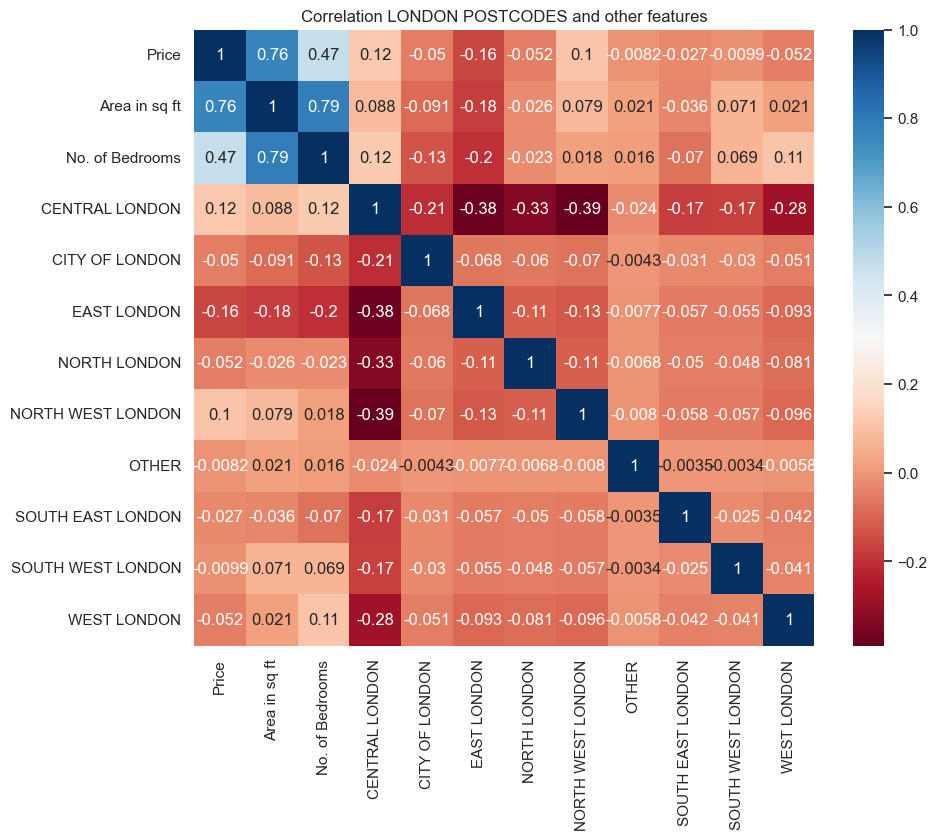

In [122]:
sns.heatmap(post_code_features.corr(), annot=True, cmap='RdBu')
plt.title('Correlation LONDON POSTCODES and other features')
plt.savefig("Resources/Correlation_between_LONDON_POSTCODES_and_other_features")

In this heatmap, the main part to look at is the 'London Postcodes' and the 'price'. There isn't much of a correlation between these values as it is close to 0 indicating no correlaion.

In [53]:
join_corr = house_features.join(pd.get_dummies(clean_df['Post Code Category'])).drop(['Post Code Category'], axis=1)
join_corr

,Price,Area in sq ft,No. of Bedrooms,Location,Duplex,Flat / Apartment,House,Mews,New development,Penthouse,Studio,CENTRAL LONDON,CITY OF LONDON,EAST LONDON,NORTH LONDON,NORTH WEST LONDON,OTHER,SOUTH EAST LONDON,SOUTH WEST LONDON,WEST LONDON
0,1675000,2716,5,Wimbledon,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1,650000,814,2,Clerkenwell,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,735000,761,2,Putney,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1765000,1986,4,Putney,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
4,675000,700,2,Putney,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3473,19950000,3698,5,Mayfair,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3476,5275000,1749,3,St James's,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3477,5995000,4435,6,Hampstead Garden Suburb,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3478,6300000,1506,3,Mayfair,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [88]:
popular_house = join_corr.drop (columns = ['Area in sq ft', 'No. of Bedrooms','Location'])
popular_house

,Price,Duplex,Flat / Apartment,House,Mews,New development,Penthouse,Studio,CENTRAL LONDON,CITY OF LONDON,EAST LONDON,NORTH LONDON,NORTH WEST LONDON,OTHER,SOUTH EAST LONDON,SOUTH WEST LONDON,WEST LONDON
0,1675000,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1,650000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,735000,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1765000,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
4,675000,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3473,19950000,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3476,5275000,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3477,5995000,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3478,6300000,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


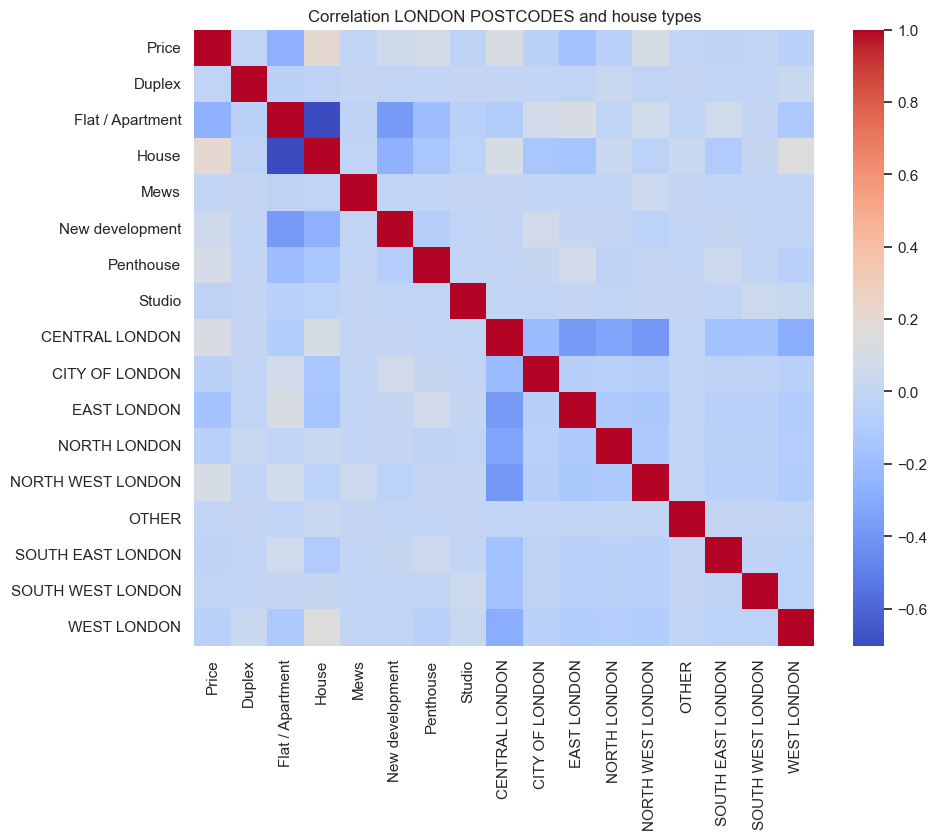

In [126]:
sns.heatmap(popular_house.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation LONDON POSTCODES and house types')
plt.savefig("Resources/Correlation_between_LONDON_POSTCODES_and_house_types")

In this heatmap, the main part to look at is the 'London Postcodes' and the 'House Types'. There isn't much of a correlation between these values as it is close to 0 indicating no correlaion. However, looking at the colours in the heatmap, the most common types of 'House Type' for each 'London Postcode' are houses and flats which is indicated by the 'beige' colour. 

In [63]:
# Count the number of each type of house
house_counts = clean_df['House Type'].value_counts()
house_counts

Flat / Apartment    1033
House                676
New development      257
Penthouse             79
Studio                 7
Duplex                 4
Mews                   2
Name: House Type, dtype: int64

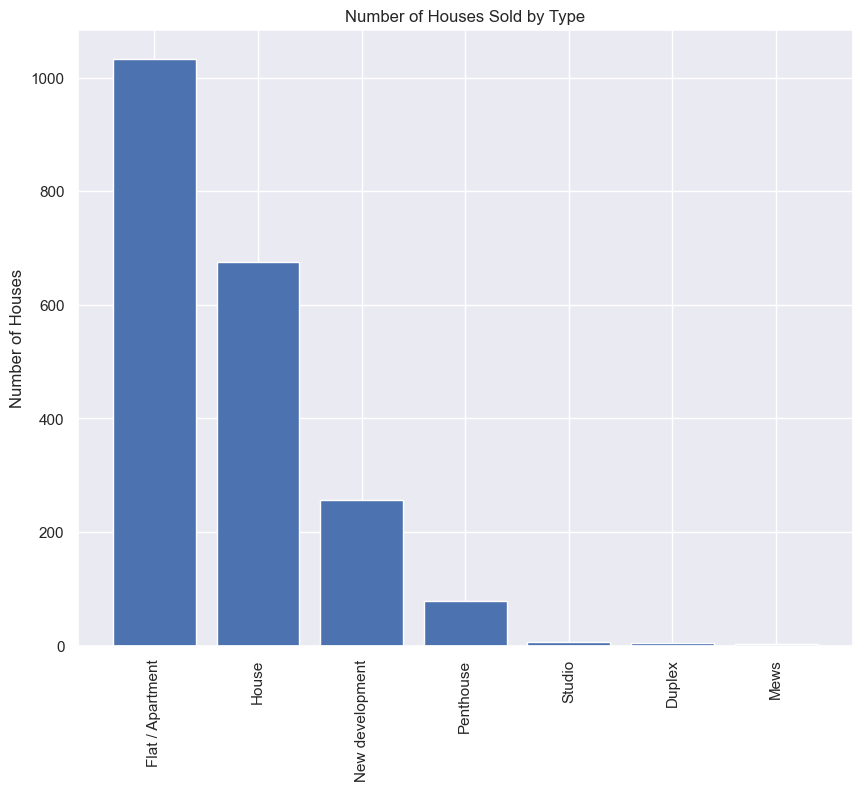

<Figure size 1000x800 with 0 Axes>

In [137]:
# Using Matplotlib to create a bar plot
plt.bar(house_counts.index, house_counts.values,)
plt.title('Number of Houses Sold by Type')
plt.ylabel('Number of Houses')
plt.xticks(rotation=90)

plt.show()
plt.savefig("Resources/Number_of_Houses_Sold_by_Type")

From this bar chart we can see that 'flat/aparment'are the most sold in London and the least is 'Mews'.

In [79]:
# Bin the prices into intervals
bins = [0, 1000000, 2000000, 3000000, 4000000, 5000000, 10000000, 20000000]
labels = ['<1M', '1-2M', '2-3M', '3-4M', '4-5M', '5-10M', '>10M']
clean_df['price_range'] = pd.cut(clean_df['Price'], bins=bins, labels=labels)
clean_df

,Price,House Type,Area in sq ft,No. of Bedrooms,Location,Post Code Category,Price_bin,price_range
0,1675000,House,2716,5,Wimbledon,CENTRAL LONDON,1.5M-2M,1-2M
1,650000,Flat / Apartment,814,2,Clerkenwell,CITY OF LONDON,500K-1M,<1M
2,735000,Flat / Apartment,761,2,Putney,CENTRAL LONDON,500K-1M,<1M
3,1765000,House,1986,4,Putney,CENTRAL LONDON,1.5M-2M,1-2M
4,675000,Flat / Apartment,700,2,Putney,CENTRAL LONDON,500K-1M,<1M
...,...,...,...,...,...,...,...,...
3473,19950000,Flat / Apartment,3698,5,Mayfair,CENTRAL LONDON,10M+,>10M
3476,5275000,Flat / Apartment,1749,3,St James's,CENTRAL LONDON,5M-5.5M,5-10M
3477,5995000,House,4435,6,Hampstead Garden Suburb,NORTH WEST LONDON,5.5M-6M,5-10M
3478,6300000,New development,1506,3,Mayfair,CENTRAL LONDON,6M-6.5M,5-10M


In [131]:
# Grouping the data by house type and price range
grouped = clean_df.groupby(['House Type', 'price_range']).size().unstack()

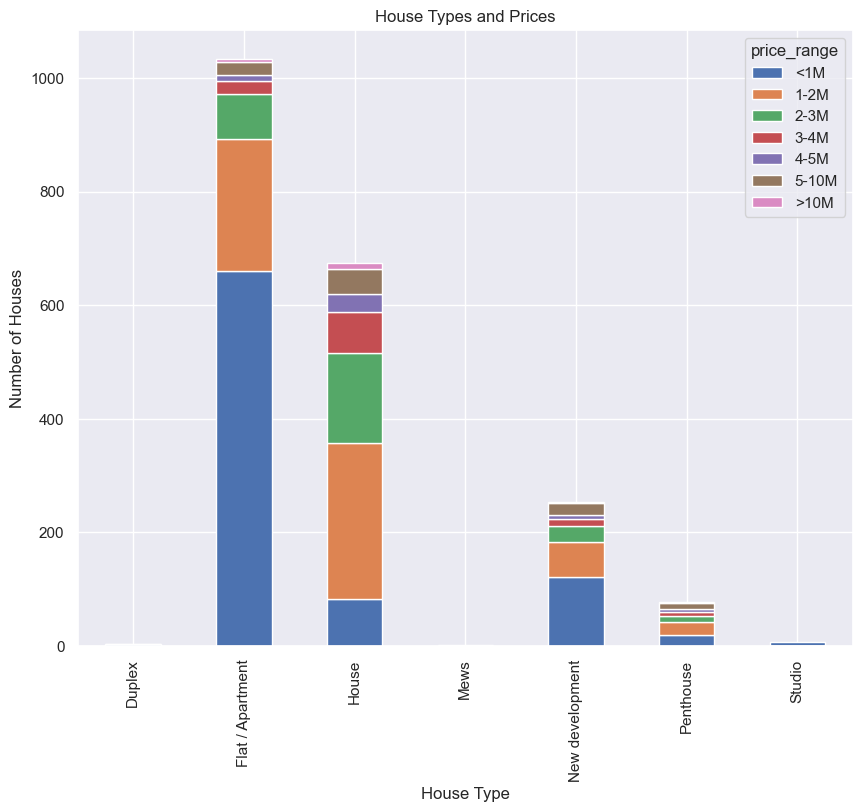

<Figure size 1000x800 with 0 Axes>

In [134]:
# Using pandas to create a stacked bar plot
ax = grouped.plot(kind='bar', stacked=True)

ax.set_xlabel('House Type')
ax.set_ylabel('Number of Houses')
ax.set_title('House Types and Prices')

plt.show()
plt.savefig("Resources/House_Types_and_Prices")

In this bar chart we can see that 'flat/apartments' are mostly sold at a lower price compared to other 'House Types', which may influence why it is mostly brought. 

In [100]:
# Merging clean_df and post_code_features into one DataFrame
merged_df = pd.merge(clean_df, post_code_features, on='Price')
merged_df

,Price,House Type_x,Area in sq ft_x,No. of Bedrooms_x,Location_x,Post Code Category,Price_bin,price_range,House Type_y,Area in sq ft_y,...,Location_y,CENTRAL LONDON,CITY OF LONDON,EAST LONDON,NORTH LONDON,NORTH WEST LONDON,OTHER,SOUTH EAST LONDON,SOUTH WEST LONDON,WEST LONDON
0,1675000,House,2716,5,Wimbledon,CENTRAL LONDON,1.5M-2M,1-2M,House,2716,...,Wimbledon,1,0,0,0,0,0,0,0,0
1,1675000,House,2716,5,Wimbledon,CENTRAL LONDON,1.5M-2M,1-2M,House,1749,...,South Hackney,0,0,1,0,0,0,0,0,0
2,1675000,House,2716,5,Wimbledon,CENTRAL LONDON,1.5M-2M,1-2M,Flat / Apartment,1101,...,Little Venice,1,0,0,0,0,0,0,0,0
3,1675000,House,2716,5,Wimbledon,CENTRAL LONDON,1.5M-2M,1-2M,House,2485,...,Wandsworth,1,0,0,0,0,0,0,0,0
4,1675000,House,2716,5,Wimbledon,CENTRAL LONDON,1.5M-2M,1-2M,House,2110,...,Hackney,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27585,4300000,House,3660,4,The City,CITY OF LONDON,4M-4.5M,4-5M,House,3660,...,The City,0,1,0,0,0,0,0,0,0
27586,19950000,Flat / Apartment,3698,5,Mayfair,CENTRAL LONDON,10M+,>10M,Flat / Apartment,3698,...,Mayfair,1,0,0,0,0,0,0,0,0
27587,5275000,Flat / Apartment,1749,3,St James's,CENTRAL LONDON,5M-5.5M,5-10M,Flat / Apartment,1749,...,St James's,1,0,0,0,0,0,0,0,0
27588,6300000,New development,1506,3,Mayfair,CENTRAL LONDON,6M-6.5M,5-10M,New development,1506,...,Mayfair,1,0,0,0,0,0,0,0,0


In [103]:
# Dropping duplicate columns
merge_df = merged_df.drop(columns = ['House Type_x','Area in sq ft_x','No. of Bedrooms_x',
                           'Location_x'])
merge_df

,Price,Post Code Category,Price_bin,price_range,House Type_y,Area in sq ft_y,No. of Bedrooms_y,Location_y,CENTRAL LONDON,CITY OF LONDON,EAST LONDON,NORTH LONDON,NORTH WEST LONDON,OTHER,SOUTH EAST LONDON,SOUTH WEST LONDON,WEST LONDON
0,1675000,CENTRAL LONDON,1.5M-2M,1-2M,House,2716,5,Wimbledon,1,0,0,0,0,0,0,0,0
1,1675000,CENTRAL LONDON,1.5M-2M,1-2M,House,1749,4,South Hackney,0,0,1,0,0,0,0,0,0
2,1675000,CENTRAL LONDON,1.5M-2M,1-2M,Flat / Apartment,1101,2,Little Venice,1,0,0,0,0,0,0,0,0
3,1675000,CENTRAL LONDON,1.5M-2M,1-2M,House,2485,6,Wandsworth,1,0,0,0,0,0,0,0,0
4,1675000,CENTRAL LONDON,1.5M-2M,1-2M,House,2110,4,Hackney,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27585,4300000,CITY OF LONDON,4M-4.5M,4-5M,House,3660,4,The City,0,1,0,0,0,0,0,0,0
27586,19950000,CENTRAL LONDON,10M+,>10M,Flat / Apartment,3698,5,Mayfair,1,0,0,0,0,0,0,0,0
27587,5275000,CENTRAL LONDON,5M-5.5M,5-10M,Flat / Apartment,1749,3,St James's,1,0,0,0,0,0,0,0,0
27588,6300000,CENTRAL LONDON,6M-6.5M,5-10M,New development,1506,3,Mayfair,1,0,0,0,0,0,0,0,0


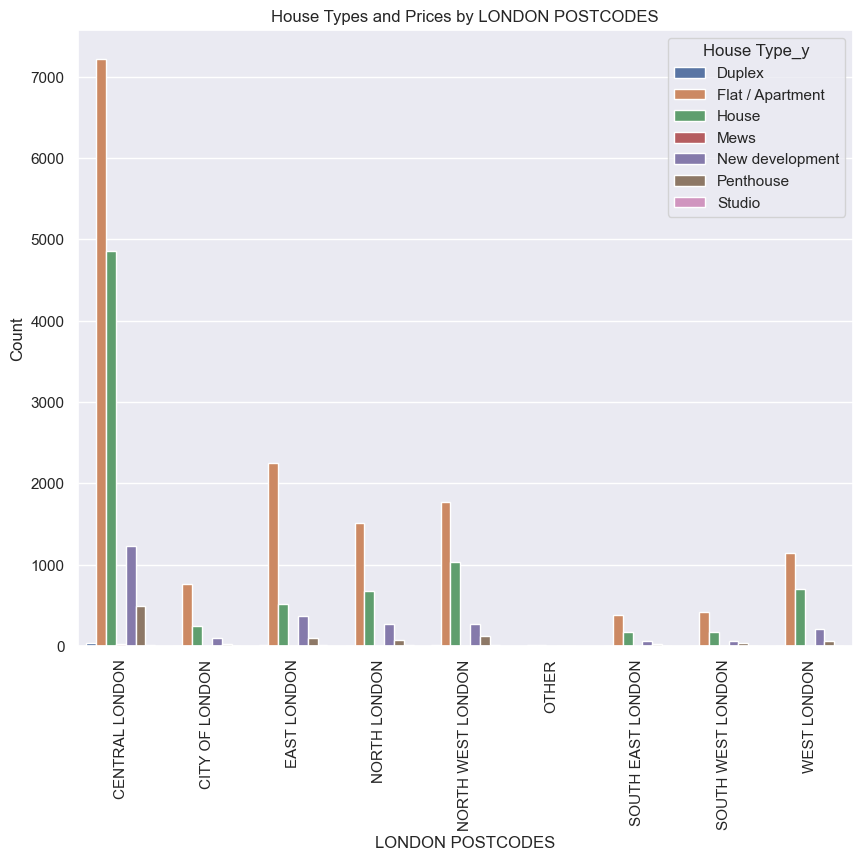

<Figure size 1000x800 with 0 Axes>

In [135]:
# Grouping the data by location category and house type
grouped = merged_df.groupby(['Post Code Category', 'House Type_y'])['Price'].count().reset_index()

# Using seaborn to create a bar chart
sns.barplot(x='Post Code Category', y='Price', hue='House Type_y', data=grouped)
plt.title('House Types and Prices by LONDON POSTCODES')
plt.xlabel('LONDON POSTCODES')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()
plt.savefig("Resources/House_Types_and_Prices_by_LONDON_POSTCODES")

Central london has the highest poplation density compared to other 'London Postcodes' that's why it has the 'tallest' bar. Form this data we can see that for all 'London Postcode', flat/apartment are the most sold and it could be due to many reasons. One reason could be, due to London being the financial center of England making it a highly desirable city to live in.